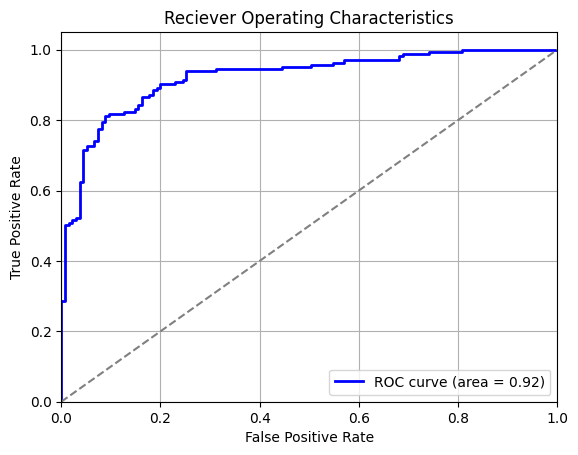

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

#step 1 : Generate the syntheti data set
x , y = make_classification(n_samples = 1000 , n_features = 10 , n_classes = 2 , random_state = 42)

# step 2 : split the data set into training and testing data sets
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3 ,random_state=42)

# step 3 : train a simple logistic regression model
model = LogisticRegression()
model.fit(x_train,y_train)

#step 4 : predict probabilities for the test set
y_scores = model.predict_proba(x_test)[:,1] #probabilities for the positive class

#step 5 : compute ROC curve
fpr,tpr,thresholds = roc_curve(y_test , y_scores)
roc_auc = auc(fpr,tpr)

#step 6 : plot theroc curve
plt.figure()
plt.plot(fpr,tpr,color  = "blue" , lw = 2 , label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1],[0,1],color = 'gray',linestyle='--') # diagonal line
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristics')
plt.legend(loc ='lower right')
plt.grid()
plt.show()